## Crime Data

Summary: <br>
This data includes all founded Criminal Code of Canada offences reported to the Ottawa Police years from 2017 to 2021. Offences have been categorized according to the Uniform Crime Reporting (UCR) Survey. For privacy reasons, the location of crime occurrences has been geomasked to the nearest intersection.

The crime data published are accurate on the day that they were produced. Due to ongoing police investigations and internal data quality control efforts, this information is subject to change, including addition, deletion and reclassification of any and all data. The attribute descriptions as well as their shortened names are provided in a list below.

Date created: June 1st, 2023

Accuracy:

The Ottawa Police provides this information in good faith but provides no warranty, nor accepts any liability arising from any incorrect, incomplete or misleading information or its improper use.

Attributes:
1. ID
2. Year (Year)
3. Reported Date (ReportDate)
4. Reported Time (ReportTime)
5. Occurrence Date (OccurDate)
6. Occurrence Time (OccurTime)
7. Reported Weekday (Weekday)
8. Criminal Offence Category (OffSummary)
9. Primary Violation (PrimViolat)
10. ONS Neighbourhood 2019 (Neighbourh)
11. Ottawa Police Sector (Sector)
12. Ottawa Police Division (Division)
13. Census Tract Name (CensusTra)

Author: Ottawa Police Service
Author email: info@ottawapolice.ca
Maintainer Organization: Finance Directorate 

## Importing All required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


## Exploratory Data Analysis

In [2]:
df=pd.read_csv('Criminal_Offences_.csv')

C:\Users\Asad\AppData\Local\Temp\ipykernel_18472\1493033842.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Criminal_Offences_.csv')


#### a. Explore Dataframe

In [3]:
df.shape

(260910, 15)

In [4]:
df.head()

,X,Y,FID,Year,ReportDate,ReportTime,OccurDate,Occur_Time,Weekday,OffSummary,PrimViolat,Neighbourh,Sector,Division,CensusTra
0,-8423236.322,5681209.293,1,2022,2022/12/10 00:00:00+00,10:40:00,2022/12/10 00:00:00+00,10:20:00,Saturday,Other Criminal Code Offences (3000),Other Criminal Code (3410),Ledbury - Heron Gate - Ridgemont - Elmwood,Sector 34,EAST DIVISION,5050005
1,-8424240.468,5682817.035,2,2022,2022/10/11 00:00:00+00,4:55:00,2022/10/10 00:00:00+00,2:45:00,Tuesday,Crimes Against Property (2000),Theft $5000 and Under (2140),Billings Bridge - Alta Vista,Sector 34,EAST DIVISION,5050004
2,-8424596.501,5682042.560,3,2022,2022/09/28 00:00:00+00,5:30:00,2022/09/28 00:00:00+00,8:00:00,Wednesday,Crimes Against Property (2000),Theft - Motor Vehicle (2135),Billings Bridge - Alta Vista,Sector 34,EAST DIVISION,5050004
3,-8424240.468,5682817.035,4,2022,2022/08/26 00:00:00+00,11:50:00,2022/08/16 00:00:00+00,7:00:00,Friday,Crimes Against Property (2000),Break and Enter (2120),Billings Bridge - Alta Vista,Sector 34,EAST DIVISION,5050004
4,-8423485.864,5681292.848,5,2022,2022/05/12 00:00:00+00,10:55:00,2022/05/05 00:00:00+00,8:00:00,Thursday,Crimes Against Property (2000),Break and Enter (2120),Billings Bridge - Alta Vista,Sector 34,EAST DIVISION,5050005


In [5]:
df.describe()

,X,Y,FID,Year
count,2.609100e+05,2.609100e+05,260910.000000,260910.000000
mean,-8.426629e+06,5.682776e+06,130455.500000,2019.108911
std,1.033449e+04,9.044146e+03,75318.373705,1.995302
min,-8.497819e+06,5.618838e+06,1.000000,2016.000000
25%,-8.430626e+06,5.677851e+06,65228.250000,2017.000000
50%,-8.426004e+06,5.686083e+06,130455.500000,2019.000000
75%,-8.422116e+06,5.688956e+06,195682.750000,2021.000000
max,-8.378081e+06,5.704508e+06,260910.000000,2022.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260910 entries, 0 to 260909
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   X           260910 non-null  float64
 1   Y           260910 non-null  float64
 2   FID         260910 non-null  int64  
 3   Year        260910 non-null  int64  
 4   ReportDate  260910 non-null  object 
 5   ReportTime  260910 non-null  object 
 6   OccurDate   260910 non-null  object 
 7   Occur_Time  260910 non-null  object 
 8   Weekday     260910 non-null  object 
 9   OffSummary  260910 non-null  object 
 10  PrimViolat  260910 non-null  object 
 11  Neighbourh  260910 non-null  object 
 12  Sector      260910 non-null  object 
 13  Division    260910 non-null  object 
 14  CensusTra   260910 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 29.9+ MB


#### b. Check object types

In [7]:
df.describe(include="object")

,ReportDate,ReportTime,OccurDate,Occur_Time,Weekday,OffSummary,PrimViolat,Neighbourh,Sector,Division,CensusTra
count,260910,260910,260910,260910,260910,260910,260910,260910,260910,260910,260910
unique,2557,720,3256,720,7,6,134,114,40,6,331
top,2022/02/18 00:00:00+00,12:00:00,2022/02/18 00:00:00+00,12:00:00,Wednesday,Crimes Against Property (2000),Theft $5000 and Under,Stittsville,23,Central,5050054
freq,206,1043,185,16224,41212,173885,73130,218742,25521,87084,8915


#### c. Exploring Target Variable

<Axes: xlabel='OffSummary'>

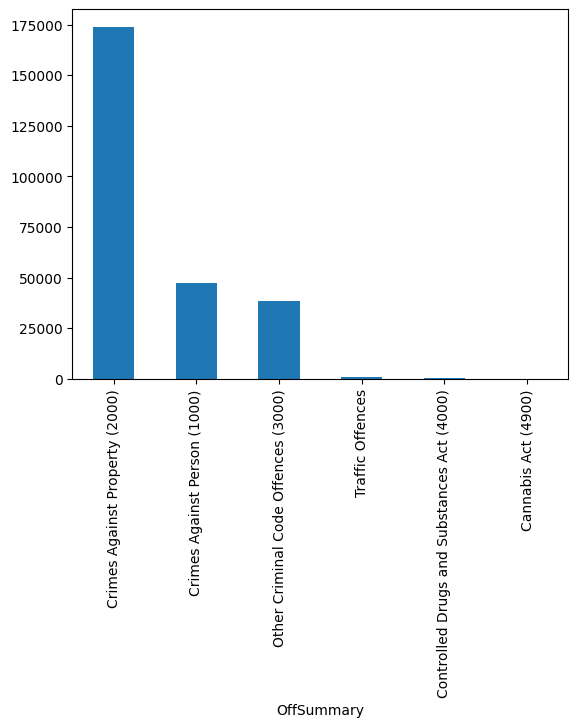

In [8]:
df['OffSummary'].value_counts().plot.bar() #unequal, can be used to stratify while data split in modeling

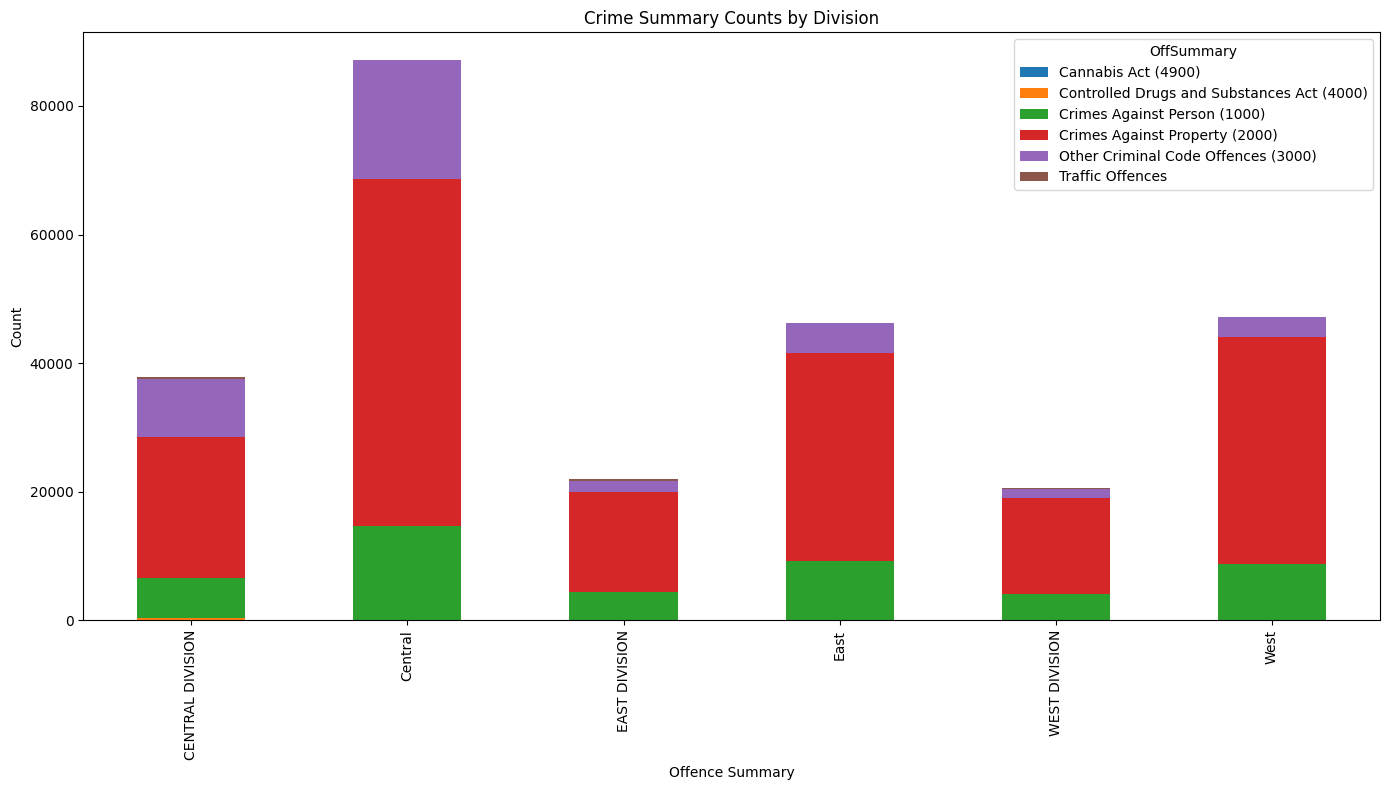

In [9]:
ct = pd.crosstab( df['Division'],df['OffSummary'])
ct.plot(kind='bar', stacked=True, figsize=(14,8))
plt.title("Crime Summary Counts by Division")
plt.xlabel("Offence Summary")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### d. Crime by Division

In [10]:
#crime trends by census tract
crime_by_tract = (
    df.groupby(['Division', 'CensusTra'])
    .size()
    .reset_index(name='Crime_Count')
    .sort_values(['Division', 'Crime_Count'], ascending=[True, False])
)

print(crime_by_tract.head(10))

            Division  CensusTra  Crime_Count
70  CENTRAL DIVISION    5050048         5864
59  CENTRAL DIVISION    5050037         2979
76  CENTRAL DIVISION    5050054         2791
60  CENTRAL DIVISION    5050038         2048
75  CENTRAL DIVISION    5050053         1291
85  CENTRAL DIVISION    5050101         1142
78  CENTRAL DIVISION    5050056         1018
26  CENTRAL DIVISION  5050053.0          792
67  CENTRAL DIVISION    5050045          738
62  CENTRAL DIVISION    5050040          712


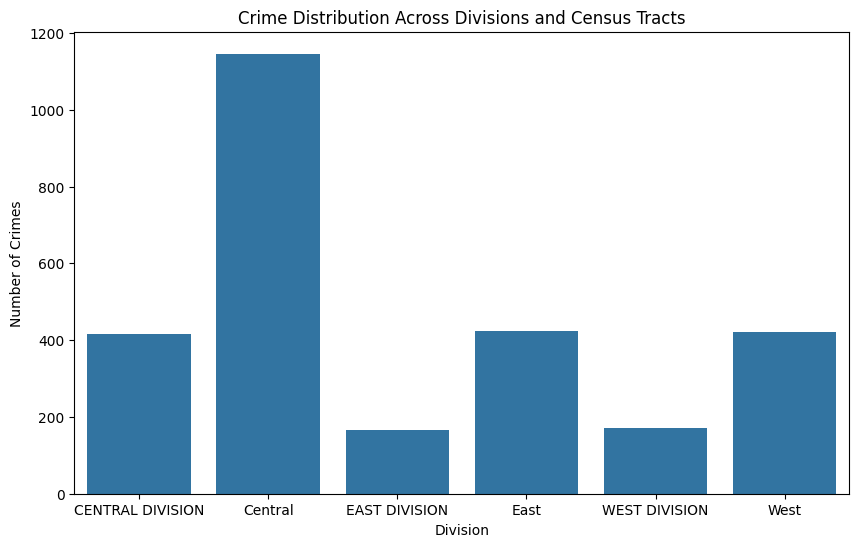

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(data=crime_by_tract, x='Division', y='Crime_Count', errorbar=None)
plt.title("Crime Distribution Across Divisions and Census Tracts")
plt.ylabel("Number of Crimes")
plt.show()

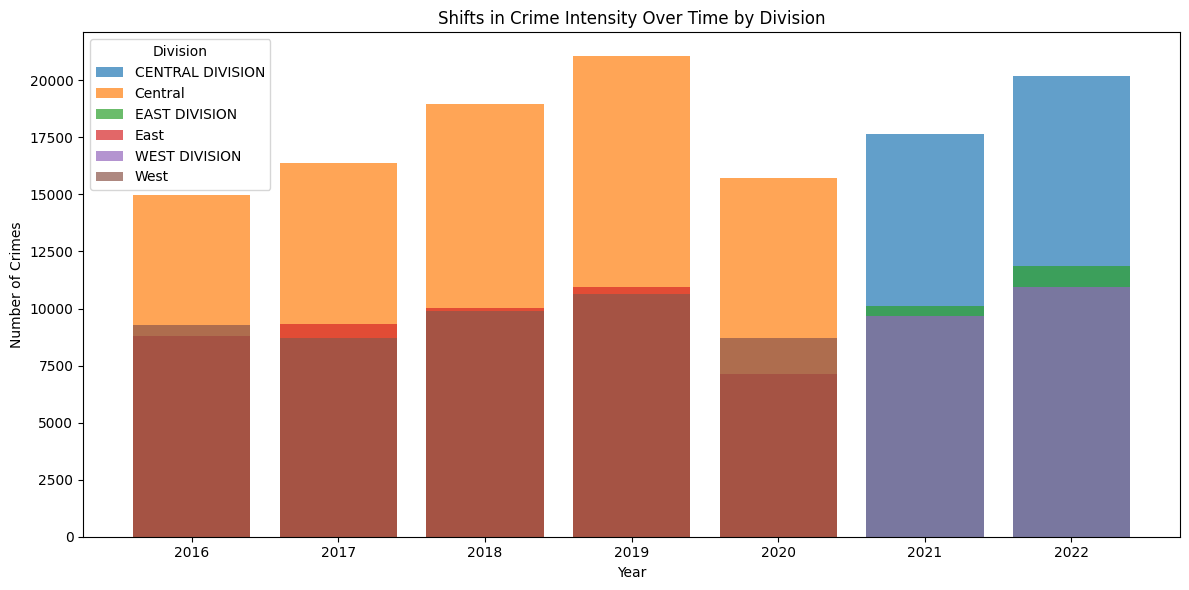

In [12]:
#regional shifts or hotspots emerging over the years

# Group data by division and year
crime_trends = df.groupby(['Division', 'Year']).size().reset_index(name='crime_count')

# Plot a bar graph
plt.figure(figsize=(12,6))
for division in crime_trends['Division'].unique():
    subset = crime_trends[crime_trends['Division'] == division]
    plt.bar(subset['Year'], subset['crime_count'], label=division, alpha=0.7)

plt.title('Shifts in Crime Intensity Over Time by Division')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Division')
plt.tight_layout()
plt.show()

#### e. Crime by Neighborhood

In [13]:
neighbour_counts = df['Neighbourh'].value_counts().reset_index()
neighbour_counts.columns = ['Neighbourh', 'Crime_Count']
print(neighbour_counts.head(10))

                                          Neighbourh  Crime_Count
0                                        Stittsville       218742
1                                         Centretown         6434
2                                      Byward Market         2081
3                                          Lowertown         1865
4                               Overbrook - McArthur         1592
5      New Barrhaven - New Development - Stonebridge         1525
6                                           Cummings         1301
7  Orleans Avalon - Notting Gate - Fallingbrook -...         1273
8                           Sandy Hill - Ottawa East          995
9                            Crestview - Meadowlands          992


In [14]:
neighbour_counts = df['Neighbourh'].value_counts().reset_index()
neighbour_counts.columns = ['Neighbourh', 'Crime_Count']
top_neigh = neighbour_counts.head(10)

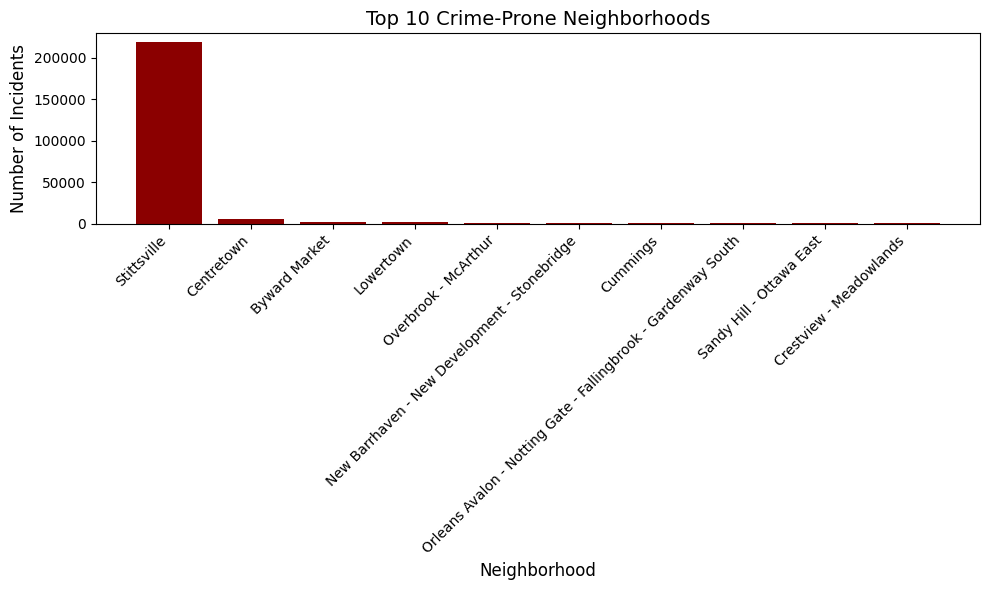

In [15]:
plt.figure(figsize=(10,6))
plt.bar(top_neigh['Neighbourh'], top_neigh['Crime_Count'], color='darkred')
plt.title("Top 10 Crime-Prone Neighborhoods", fontsize=14)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### e. Crime by Weekday

C:\Users\Asad\AppData\Local\Temp\ipykernel_18472\1017613486.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


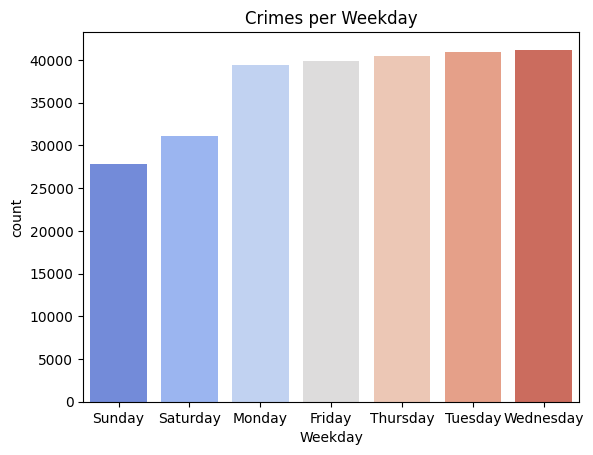

In [16]:
weekday_order = df['Weekday'].value_counts().sort_values().index

# Plot
sns.countplot(
    data=df,
    x='Weekday',
    order=weekday_order,
    palette='coolwarm', legend=False
)

plt.title('Crimes per Weekday')
plt.show()

#### f. Verifying the coordinates are for Ottawa Region Only

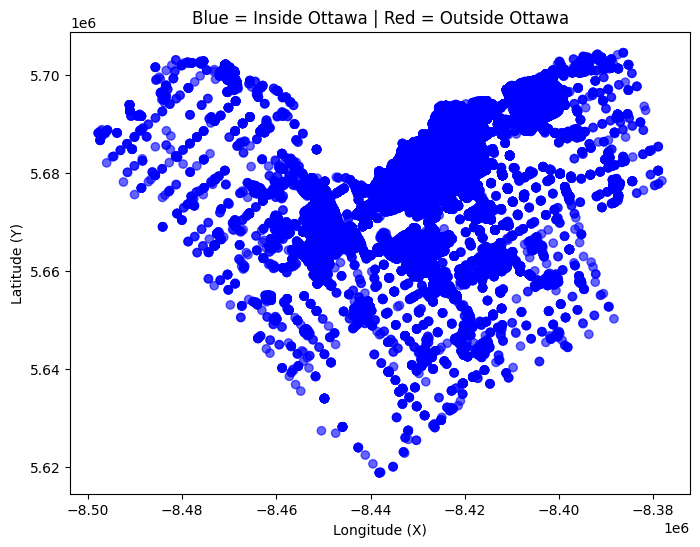

In [17]:
# Step 1: Define Ottawa’s rough coordinate box
x_min, x_max = -76.1, -75.4   # Longitude range
y_min, y_max = 45.2, 45.5     # Latitude range

# Step 2: Create a flag column
Outside_Ottawa= ~(
    (df['X'].between(x_min, x_max)) &
    (df['Y'].between(y_min, y_max))
)

# Step 3: Plot points
plt.figure(figsize=(8,6))
plt.scatter(df['X'], df['Y'], 
            c=Outside_Ottawa.map({True:'Blue', False:'Red'}), 
            alpha=0.6)
plt.title('Blue = Inside Ottawa | Red = Outside Ottawa')
plt.xlabel('Longitude (X)')
plt.ylabel('Latitude (Y)')
plt.show()

## Data Cleaning

### 1. Identifying Duplicates

In [18]:
#find the duplicate rows 
duplicates = df.duplicated() # No duplicates
duplicates[duplicates==True]

Series([], dtype: bool)

### 2. Check Missing Values

In [19]:
df.isna().sum() #no nulls

X             0
Y             0
FID           0
Year          0
ReportDate    0
ReportTime    0
OccurDate     0
Occur_Time    0
Weekday       0
OffSummary    0
PrimViolat    0
Neighbourh    0
Sector        0
Division      0
CensusTra     0
dtype: int64

### 3. Check Outliers

In [20]:
df.describe() #no outliers observed

,X,Y,FID,Year
count,2.609100e+05,2.609100e+05,260910.000000,260910.000000
mean,-8.426629e+06,5.682776e+06,130455.500000,2019.108911
std,1.033449e+04,9.044146e+03,75318.373705,1.995302
min,-8.497819e+06,5.618838e+06,1.000000,2016.000000
25%,-8.430626e+06,5.677851e+06,65228.250000,2017.000000
50%,-8.426004e+06,5.686083e+06,130455.500000,2019.000000
75%,-8.422116e+06,5.688956e+06,195682.750000,2021.000000
max,-8.378081e+06,5.704508e+06,260910.000000,2022.000000


## Feature Engineering

### 1. Date and Time Columns

Splitting ReportDate, ReportTime, OccurDate and OccurTime into sub-columns

In [21]:
df['ReportDate2'] = pd.to_datetime(df['ReportDate'], errors='coerce')
# Extract year, month, day as integers
df['ReportDate_year'] = df['ReportDate2'].dt.year
df['ReportDate_month'] = df['ReportDate2'].dt.month
df['ReportDate_day'] = df['ReportDate2'].dt.day

# Convert ReportTime to datetime (time only)
df['ReportTime2'] = pd.to_datetime(df['ReportTime'], format='%H:%M:%S', errors='coerce')
# Extract hour, minute, second as integers
df['ReportTime_hour'] = df['ReportTime2'].dt.hour
df['ReportTime_minute'] = df['ReportTime2'].dt.minute
df['ReportTime_second'] = df['ReportTime2'].dt.second

# Convert OccurDate to datetime
df['OccurDate2'] = pd.to_datetime(df['OccurDate'], errors='coerce')
# Extract year, month, day as integers
df['OccurDate_year'] = df['OccurDate2'].dt.year
df['OccurDate_month'] = df['OccurDate2'].dt.month
df['OccurDate_day'] = df['OccurDate2'].dt.day

# Convert Occur_Time to datetime (time only)
df['OccurTime2'] = pd.to_datetime(df['Occur_Time'], format='%H:%M:%S', errors='coerce')
# Extract hour, minute, second as integers
df['OccurTime_hour'] = df['OccurTime2'].dt.hour
df['OccurTime_minute'] = df['OccurTime2'].dt.minute
df['OccurTime_second'] = df['OccurTime2'].dt.second

Drop copy of the original columns that were used to split dates and times

In [22]:
df.drop('ReportDate2',inplace=True,axis=1)
df.drop('ReportTime2',inplace=True,axis=1)
df.drop('OccurDate2',inplace=True,axis=1)
df.drop('OccurTime2',inplace=True,axis=1)

Drop original columns of date and time

In [23]:
df.drop('ReportDate',inplace=True,axis=1)
df.drop('ReportTime',inplace=True,axis=1)
df.drop('OccurDate',inplace=True,axis=1)
df.drop('Occur_Time',inplace=True,axis=1)

Count crimes by hour

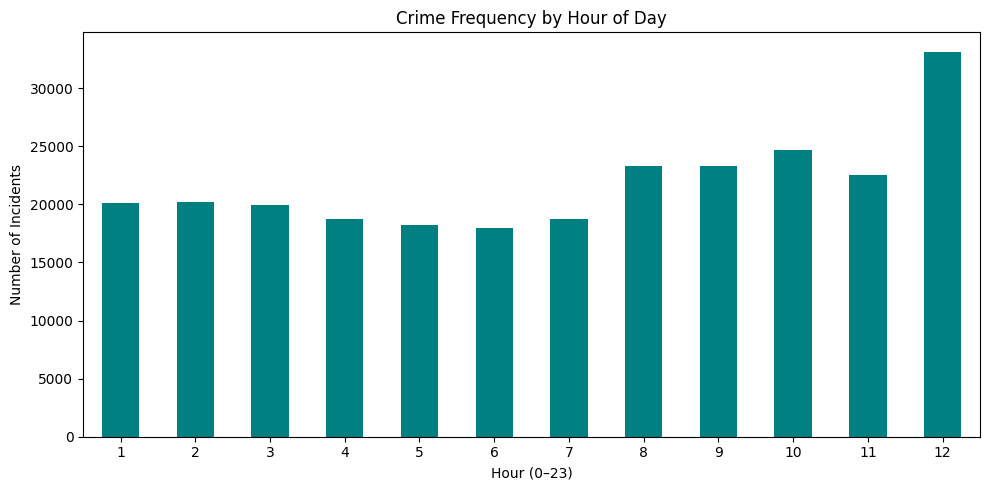

In [24]:
# 
hourly_counts = df['OccurTime_hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
hourly_counts.plot(kind='bar', color='teal')
plt.title("Crime Frequency by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


What It Means
- The spike at hour 12 suggests that crime incidents peak around midday.
- This could be due to:
- Increased public activity (lunch breaks, shopping, transit)
- More opportunities for property crimes or interpersonal conflicts
- Business hours when fraud or theft might occur

🔍 Want to Dig Deeper?
You could:
- Compare offense types at hour 12 using groupby(['OccurTime_hour', 'PrimViolat'])
- See if certain neighborhoods contribute more to that spike
- Overlay weekday vs. hour to spot patterns like “Monday noon surges”



### 2. Combining the divisions into groups

In [25]:
# Standardize Division column
df['Division'] = df['Division'].str.upper().str.strip()

# Create a mapping dictionary
division_map = {
    'EAST DIVISION': 'EAST',
    'CENTRAL DIVISION': 'CENTRAL',
    'WEST DIVISION': 'WEST'
}

# Replace values using the dictionary
df['Division'] = df['Division'].replace(division_map)

# Now verify
print(df['Division'].value_counts())

Division
CENTRAL    124925
EAST        68148
WEST        67837
Name: count, dtype: int64


### 3. Converting categorical columns to numeric

#### Check Categorical columns

In [26]:
df.describe(include='object')

,Weekday,OffSummary,PrimViolat,Neighbourh,Sector,Division,CensusTra
count,260910,260910,260910,260910,260910,260910,260910
unique,7,6,134,114,40,3,331
top,Wednesday,Crimes Against Property (2000),Theft $5000 and Under,Stittsville,23,CENTRAL,5050054
freq,41212,173885,73130,218742,25521,124925,8915


#### a. Sector (using to_numeric)

In [27]:
# Convert to string & uppercase to avoid case issues
df['Sector'] = df['Sector'].astype(str).str.upper().str.strip()

# Remove the word SECTOR if it exists
df['Sector'] = df['Sector'].str.replace('SECTOR', '').str.strip() #helps to convert sector11 and 11 into 1 category

# Convert to numeric
df['Sector'] = pd.to_numeric(df['Sector'], errors='coerce')

# Check the results
print(df['Sector'].unique())

[ 34.  35.  15.  17.  32.  16.  13.  23.  22.  21.  14.  31.  33.  25.
  24.  36.  12.  37.  11.  nan 408.]


Sector has 1 outlier: 408 and Nan values

In [28]:
df['Sector'].isna().value_counts()

Sector
False    260898
True         12
Name: count, dtype: int64

Sector has 12 nulls: Nan Fake Calls, needs to drop

In [29]:
df['Sector'].unique()

array([ 34.,  35.,  15.,  17.,  32.,  16.,  13.,  23.,  22.,  21.,  14.,
        31.,  33.,  25.,  24.,  36.,  12.,  37.,  11.,  nan, 408.])

In [30]:
df['Sector'].dropna()

0         34.0
1         34.0
2         34.0
3         34.0
4         34.0
          ... 
260905    31.0
260906    31.0
260907    31.0
260908    31.0
260909    31.0
Name: Sector, Length: 260898, dtype: float64

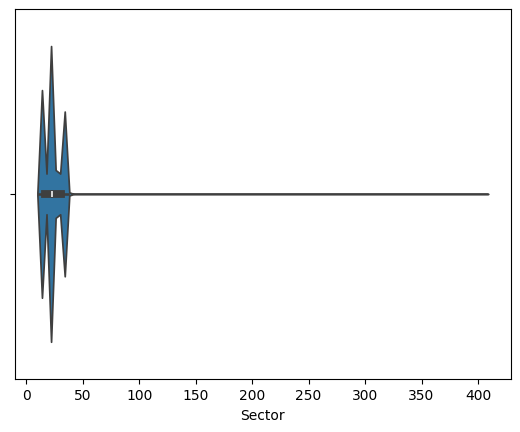

In [31]:
sns.violinplot(df.Sector, orient='h')
plt.show()

#### b. Neighbourh, Weekday, OffSummary, PrimViolat, Division (using Label Encoder)

Note: <br> 
Although its a possibility that label encoder might cause some bias with higher numbers in categories but we prefer it because these columns have 3 or more categories which would result in 15-20 new columns. Therefore we avoid using get_dummies() function. 

Prerequisite: Saving Actual values of our Target variable before encoding, to identify which number refers to which category

In [32]:
#for future help
le = LabelEncoder()
Target = le.fit_transform(df['OffSummary'])
mapping_target = pd.DataFrame({
    'OffSummary': le.classes_,
    'encoded_value': le.transform(le.classes_)
})
print(mapping_target.head())

                                   OffSummary  encoded_value
0                         Cannabis Act (4900)              0
1  Controlled Drugs and Substances Act (4000)              1
2                Crimes Against Person (1000)              2
3              Crimes Against Property (2000)              3
4         Other Criminal Code Offences (3000)              4


In [33]:
le = LabelEncoder()
df['Neighbourh'] = le.fit_transform(df['Neighbourh'])
df['Weekday']	= le.fit_transform(df['Weekday'])
df['OffSummary']= le.fit_transform(df['OffSummary'])	
df['PrimViolat']	= le.fit_transform(df['PrimViolat'])
df['Neighbourh']= le.fit_transform(df['Neighbourh'])
df['Division']	= le.fit_transform(df['Division'])


### 4. Drop irrelevant features

In [34]:
df.drop('FID',inplace=True, axis=1)

In [35]:
df.drop('CensusTra', inplace=True, axis=1)

## Data Partition and Modeling

In [36]:
# Seperate the input features and target variable
x = df.drop('OffSummary',axis=1)
y = df.OffSummary
y.head(2)

0    4
1    3
Name: OffSummary, dtype: int64

## 80:20 Split

#### a. Train Test Split    

In [37]:
# splitting the data in training and testing set
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, stratify=y) #stratify is class variable, y has different proportion

In [38]:
df.shape

(260910, 21)

In [39]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((208728, 20), (52182, 20), (208728,), (52182,))

#### b. Normalize the Variables

In [40]:
# scale the data using min-max scalar
scale = MinMaxScaler()

In [41]:
# Fit-transform on train data
xtrain_scaled = scale.fit_transform(xtrain)
xtest_scaled = scale.transform(xtest) #do not fit, only transform based on trainset(avoid data leaking):use min and max values from the train set to compute minmax scale

#### c. Apply Multiclass-Classification Models

#### 1. Random Forest

In [42]:
rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)

RandomForestClassifier()

In [43]:
ypred = rfmodel.predict(xtest_scaled)

accuracy_score(ypred, ytest)

e:\Algonquin_College\ac-venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.4514583572879537

##### 1a. Tuning Hyperparameters

In [44]:
# Let's list the tunable hyperparameters for Random Forest algorithm
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### 1b. Hyperparameter Tuning

In [45]:
rfmodel = RandomForestClassifier(n_estimators=2,
                                 max_depth=2,
                                 max_features=10)
rfmodel.fit(xtrain, ytrain)

# predict on xtest
ypred = rfmodel.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(ypred, ytest),'\n')
print(confusion_matrix(ytest, ypred))

0.7599555402245985 

[[    0     0     1     4     0     0]
 [    0     0     0    89     0     0]
 [    0     0  5035  4441     0     0]
 [    0     0   156 34621     0     0]
 [    0     0     0  7691     0     0]
 [    0     0     0   144     0     0]]


In [46]:
# plot a feature importance chart
rfmodel.feature_importances_

array([0.        , 0.12605508, 0.        , 0.        , 0.87175151,
       0.        , 0.0021934 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

##### 1c. Cross Validation

K Fold Splits using Random Forest

In [47]:
# Set up a KFold cross-validation
kfold = KFold(n_splits=5)

# Use cross-validation to evaluate the model
rf_scores = cross_val_score(rfmodel, xtrain_scaled, ytrain, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores:", rf_scores)

# Print the mean accuracy and standard deviation of the model
print("Mean accuracy:", rf_scores.mean())
print("Standard deviation:", rf_scores.std())


Accuracy scores: [0.76261199 0.75691084 0.73978345 0.76277398 0.76461852]
Mean accuracy: 0.7573397565874675
Standard deviation: 0.009151124438220252


## 70:30 Split

#### a. Train Test Split    

stratify is class variable, y has different proportion

In [48]:
# splitting the data in training and testing set
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, stratify=y) #

In [49]:
df.shape

(260910, 21)

In [50]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((182637, 20), (78273, 20), (182637,), (78273,))

#### b. Normalize the Variables

In [51]:
# scale the data using min-max scalar
scale = MinMaxScaler()

In [52]:
# Fit-transform on train data
xtrain_scaled = scale.fit_transform(xtrain)
xtest_scaled = scale.transform(xtest) #do not fit, only transform based on trainset(avoid data leaking):use min and max values from the train set to compute minmax scale

#### c. Apply Multiclass-Classification Models

#### 2. Random Forest

In [53]:
rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)

RandomForestClassifier()

In [54]:
ypred = rfmodel.predict(xtest_scaled)

accuracy_score(ypred, ytest)

e:\Algonquin_College\ac-venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.666449478108671

##### 2a. Tuning Hyperparameters

In [55]:
# Let's list the tunable hyperparameters for Random Forest algorithm
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### 2b. Hyperparameter Tuning

In [56]:
rfmodel = RandomForestClassifier(n_estimators=2,
                                 max_depth=2,
                                 max_features=10)
rfmodel.fit(xtrain, ytrain)

# predict on xtest
ypred = rfmodel.predict(xtest)

print(accuracy_score(ypred, ytest),'\n')
print(confusion_matrix(ytest, ypred))

0.7066549129329398 

[[    0     0     0     7     0     0]
 [    0     0     0   133     0     0]
 [    0     0  3252 10963     0     0]
 [    0     0   105 52060     0     0]
 [    0     0     0 11537     0     0]
 [    0     0     0   216     0     0]]


In [57]:
# plot a feature importance chart
rfmodel.feature_importances_

array([0.06232264, 0.44050605, 0.        , 0.        , 0.36222951,
       0.        , 0.        , 0.07544784, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05949395, 0.        ])

##### 2c. Cross Validation

K Fold Splits using Random Forest

In [58]:
# Set up a KFold cross-validation
kfold = KFold(n_splits=5)

# Use cross-validation to evaluate the model
rf_scores = cross_val_score(rfmodel, xtrain_scaled, ytrain, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores:", rf_scores)

# Print the mean accuracy and standard deviation of the model
print("Mean accuracy:", rf_scores.mean())
print("Standard deviation:", rf_scores.std())


Accuracy scores: [0.75886991 0.76341437 0.66611    0.76012265 0.76275084]
Mean accuracy: 0.7422535533480709
Standard deviation: 0.03810818097434505


## 85:15 Split

#### a. Train Test Split    

stratify is class variable, y has different proportion

In [59]:
# splitting the data in training and testing set
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.15, stratify=y) #

In [60]:
df.shape

(260910, 21)

In [61]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((221773, 20), (39137, 20), (221773,), (39137,))

#### b. Normalize the Variables

In [62]:
# scale the data using min-max scalar
scale = MinMaxScaler()

In [63]:
# Fit-transform on train data
xtrain_scaled = scale.fit_transform(xtrain)
xtest_scaled = scale.transform(xtest) #do not fit, only transform based on trainset(avoid data leaking):use min and max values from the train set to compute minmax scale

#### c. Apply Multiclass-Classification Models

#### 3. Random Forest

In [64]:
rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)

RandomForestClassifier()

In [65]:
ypred = rfmodel.predict(xtest_scaled)

accuracy_score(ypred, ytest)

e:\Algonquin_College\ac-venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.6664537394281627

##### 3a. Tuning Hyperparameters

In [66]:
# Let's list the tunable hyperparameters for Random Forest algorithm
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### 3b. Hyperparameter Tuning

In [67]:
rfmodel = RandomForestClassifier(n_estimators=2,
                                 max_depth=2,
                                 max_features=10)
rfmodel.fit(xtrain, ytrain)

# predict on xtest
ypred = rfmodel.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(ypred, ytest),'\n')
print(confusion_matrix(ytest, ypred))

0.7170452512967269 

[[    0     0     0     3     0     0]
 [    0     0     0    63     3     0]
 [    0     0     0  6528   580     0]
 [    0     0     0 25212   871     0]
 [    0     0     0  2918  2851     0]
 [    0     0     0   105     3     0]]


In [68]:
# plot a feature importance chart
rfmodel.feature_importances_

array([0.        , 0.13610703, 0.        , 0.        , 0.43876103,
       0.        , 0.31023989, 0.058318  , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05657406, 0.        ])

##### 3c. Cross Validation

K Fold Splits using Random Forest

In [69]:
# Set up a KFold cross-validation
kfold = KFold(n_splits=5)

# Use cross-validation to evaluate the model
rf_scores = cross_val_score(rfmodel, xtrain_scaled, ytrain, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores:", rf_scores)

# Print the mean accuracy and standard deviation of the model
print("Mean accuracy:", rf_scores.mean())
print("Standard deviation:", rf_scores.std())


Accuracy scores: [0.76356668 0.75962124 0.7612445  0.76015692 0.76180277]
Mean accuracy: 0.7612784216421506
Standard deviation: 0.0013795820334060868


## Conclusion

Compare accuracies, identifying best model